In [1]:
import logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

import os
os.chdir("..")

from src.db import Database

LOGGER = logging.getLogger(__name__)
logging.basicConfig(level = logging.INFO)

plt.rcParams.update({
    "text.usetex": True,
    "figure.dpi": 120,
    "text.latex.preamble": r'\usepackage{{amsmath}}'})

mpl.style.use("seaborn-deep")

In [14]:
# Set tables
tables = ["active_inference", "bayesian_mechanics", "free_energy", "friston", "karl_friston", "predictive_coding", "predictive_processing"]
# tables = ["active_inference", "bayesian_mechanics", "free_energy"]

# Load database
database = Database()
database.load(tables=tables)
db = database.db
db = db[db["publication_year"] > 1998]
db = db[db["publication_year"] < 2024]

pby = pd.DataFrame(db["publication_year"].value_counts()).reset_index()
pby.columns = ["year", "count"]

INFO:src.db:Checking tables...
INFO:src.db:Loading tables...
INFO:src.db:Tables downloaded from PubMed on Thursday, Sept. 14, 2023.


<Figure size 720x480 with 0 Axes>

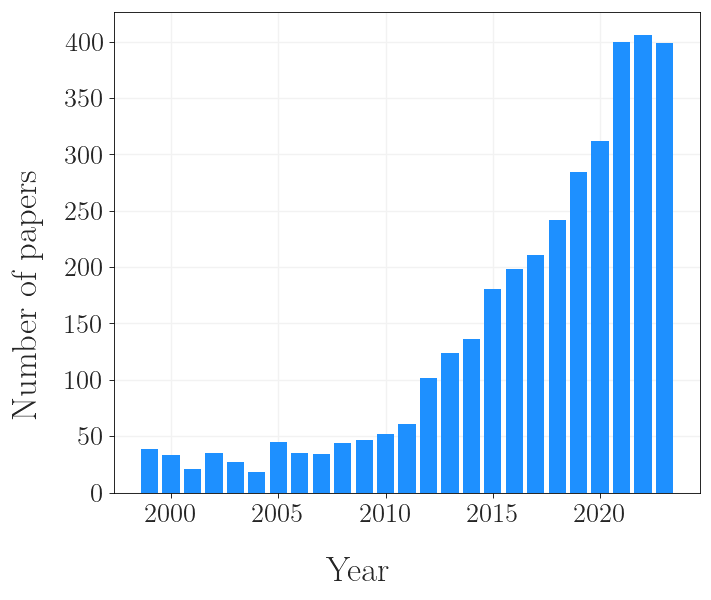

In [15]:
plt.style.use("seaborn-whitegrid")
fig = plt.figure()
fig, ax = plt.subplots(1,1, facecolor=(1,1,1), figsize=(6,5))

# Plots
ax.bar(pby["year"], pby["count"], color="#1E90FF")

# Axis global labels
fig.supxlabel(r"$\textrm{Year}$", fontsize=21)
fig.supylabel(r"$\textrm{Number of papers}$", fontsize=21)

# Cosmetic changes and axes ranges
ax.axes.grid(which="major", axis="both", c="#f2f2f2")
plt.setp(ax.spines.values(), color="black", linewidth=0.5)
ax.tick_params(
    labelsize=16,
    axis='both',          
    which='major',      
    bottom=True,
    left=True,
    color="black",
    width=0.5,
    length=3)

fig.tight_layout()

In [17]:
fig.savefig("publications.pdf", bbox_inches="tight", dpi=300)